# Pendulum animation 1
from https://deepnote.com/app/derek-vasquez/Pendulum-Animation-b0a01408-45f9-4628-a372-97209e959cd1 

In [ ]:
# Install ffmpeg (allows us to create videos)
#!apt update -y
#!apt install ffmpeg -y

In [3]:
# Normal python mathy code
# Import Libraries:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.patches import Circle

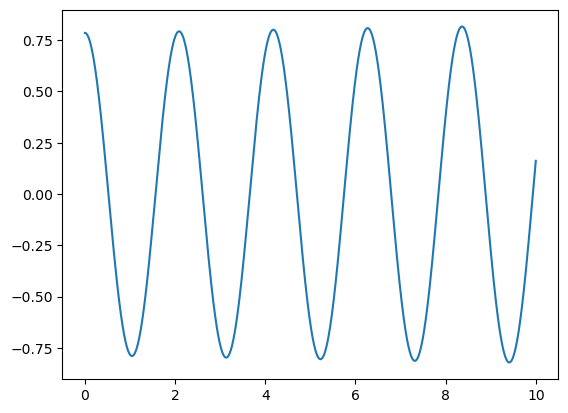

In [4]:
# Pendulum Parameters
g = 9.8
L = 1

# We need an array of time points from 0 to 10 in increments of 0.01 seconds 
dt = 0.001
t_vec = np.arange(0,10,dt) 

# Initialize a vector of zeros
theta_vec = np.zeros(len(t_vec)) 
dtheta_vec = np.zeros(len(t_vec)) 

# Set our initial condition 
theta_vec[0] = np.pi/4 # initial angle
dtheta_vec[0] = 0 # initial angular velocity

# Loop through time 
# Euler's Method (approximately integrates the differential equation) 
for i in range(1, len(t_vec)): 
  theta_vec[i] = theta_vec[i-1] + dtheta_vec[i-1]*dt
  dtheta_vec[i] = dtheta_vec[i-1] + (-g/L*np.sin(theta_vec[i-1]))*dt

plt.plot(t_vec,theta_vec) 
plt.show() 

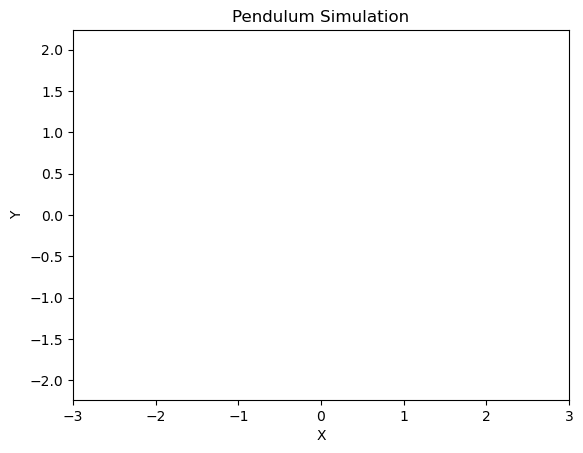

In [7]:
# Set up our figure for drawing our pendulum
fig, ax = plt.subplots()
# create a plot on those axes, which is currently empty
p, = ax.plot([],[], color='cornflowerblue') # initializes an empty plot
ax.set_xlim([-3, 3])  # X lim
ax.set_ylim([-3, 3])  # Y lim
ax.axis('equal')
ax.set_xlabel('X')   # x label
ax.set_ylabel('Y')   # y label
ax.set_title('Pendulum Simulation')
video_title = "Simulation"

In [9]:
# Now we want to plot stuff
c = Circle((0,0),radius=0.1, color='cornflowerblue')
ax.add_patch(c)

# define information for our animation
FPS = 20
sample_rate = int((1/FPS) / dt)
dpi = 300 # quality of the video
writerObj = FFMpegWriter(fps=FPS)

# Now we're putting the rod and bob in the right place
# initialize an array containing the positions of the pendulum
simulation_size = len(t_vec) # number of sim time points
x_pendulum = np.zeros(simulation_size)
y_pendulum = np.zeros(simulation_size)

for i in range(0,simulation_size):
  x_pendulum[i] = L*np.sin(theta_vec[i])
  y_pendulum[i] = -L*np.cos(theta_vec[i])

In [7]:
# we've computed all the pendulum positions
# Now we need to update the plot in a loop and store each
# of the frames in a video

# Plot and create animation
with writerObj.saving(fig, video_title+".mp4", dpi):
  # Loop through the frames we want to animate
  for i in range(0, simulation_size, sample_rate):
    # update the pendulum arm
    x_data_points = [0, x_pendulum[i]]
    y_data_points = [0, y_pendulum[i]]

    p.set_data(x_data_points,y_data_points)
    # update our bob circle
    patch_center = x_pendulum[i], y_pendulum[i]
    # ^ note: the commas without brackets create a LIST
    c.center = patch_center

    # update drawing
    fig.canvas.draw()
    # grab and save frame
    writerObj.grab_frame()

In [8]:
# import the video you just made and run it on the notebook
from IPython.display import Video

In [9]:
Video("/work/Simulation.mp4", embed=True, width=640, height=480)